<a href="https://colab.research.google.com/github/FuturisticLover123/learning/blob/main/DataAnalys/lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ЛБ07. Анализ данных (задания 2.3.1-2.3.4)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from scipy.stats import norm
import warnings

## 2.3.1 Проверка экпоненциального роста

Анализ роста температур в Белгороде с января по апрель 2022 года

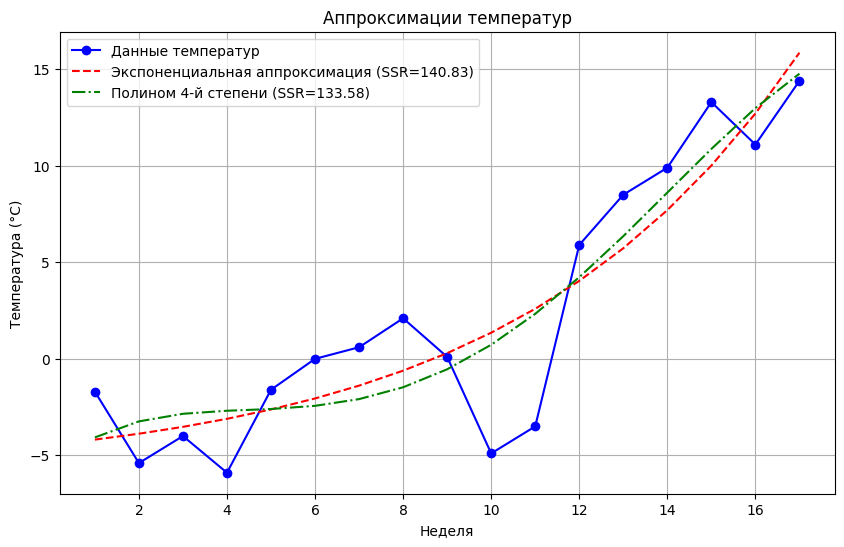

F-статистика для сравнения моделей: 0.3257
P-значение: 0.7282
Нет значимых доказательств, что полиномиальная модель лучше экспоненциальной.

Мощность проверки для лучшей модели (exp) против худшей (poly4): 0.1500

R² для экспоненциальной модели: 0.8122
R² для полиномиальной модели 4-го порядка: 0.8219


In [ ]:
# Данные о средних температурах по неделям
weeks = np.arange(1, 18)  # недели с 1 по 17
temperatures = np.array([-1.7, -5.4, -4.0, -5.9, -1.6, 0.0, 0.6, 2.1, 0.1,
                         -4.9, -3.5, 5.9, 8.5, 9.9, 13.3, 11.1, 14.4])

# Визуализация данных
# plt.figure(figsize=(10, 6))
# plt.plot(weeks, temperatures, 'bo-', label='Данные температур')
# plt.xlabel('Неделя')
# plt.ylabel('Температура (°C)')
# plt.title('Средние температуры в Белгороде по неделям (январь-апрель 2022)')
# plt.grid(True)
# plt.legend()
# plt.show()

# Определение функций для аппроксимации
def exp_func(x, a, b, c):
    return a * np.exp(b * x) + c

def poly4_func(x, a, b, c, d, e):
    return a*x**4 + b*x**3 + c*x**2 + d*x + e

# Аппроксимация экспоненциальной функцией
exp_params, exp_cov = curve_fit(exp_func, weeks, temperatures, p0=(1, 0.1, -10))
exp_pred = exp_func(weeks, *exp_params)
exp_ssr = np.sum((temperatures - exp_pred)**2)

# Аппроксимация полиномом 4-й степени
poly4_params = np.polyfit(weeks, temperatures, 4)
poly4_pred = np.polyval(poly4_params, weeks)
poly4_ssr = np.sum((temperatures - poly4_pred)**2)

# Визуализация аппроксимаций
plt.figure(figsize=(10, 6))
plt.plot(weeks, temperatures, 'bo-', label='Данные температур')
plt.plot(weeks, exp_pred, 'r--', label=f'Экспоненциальная аппроксимация (SSR={exp_ssr:.2f})')
plt.plot(weeks, poly4_pred, 'g-.', label=f'Полином 4-й степени (SSR={poly4_ssr:.2f})')
plt.xlabel('Неделя')
plt.ylabel('Температура (°C)')
plt.title('Аппроксимации температур')
plt.grid(True)
plt.legend()
plt.show()

# Сравнение моделей с помощью F-теста
def f_test(ssr_simple, ssr_complex, df_simple, df_complex, n):
    f_stat = ((ssr_simple - ssr_complex)/(df_complex - df_simple)) / (ssr_complex/(n - df_complex))
    p_value = 1 - stats.f.cdf(f_stat, df_complex - df_simple, n - df_complex)
    return f_stat, p_value

n = len(temperatures)
df_exp = 3  # экспоненциальная модель имеет 3 параметра
df_poly4 = 5  # полином 4-й степени имеет 5 параметров

# Сравниваем полиномиальную модель с экспоненциальной
f_stat, p_value = f_test(exp_ssr, poly4_ssr, df_exp, df_poly4, n)
print(f"F-статистика для сравнения моделей: {f_stat:.4f}")
print(f"P-значение: {p_value:.4f}")

# Определение лучшей модели
alpha = 0.05
if p_value < alpha:
    print("Полиномиальная модель 4-го порядка значительно лучше описывает данные.")
    best_model = 'poly4'
    worst_model = 'exp'
else:
    print("Нет значимых доказательств, что полиномиальная модель лучше экспоненциальной.")
    best_model = 'exp'
    worst_model = 'poly4'

# Расчет мощности теста
effect_size = np.abs(poly4_ssr - exp_ssr)/np.std(temperatures)
power = sm.stats.FTestPower().power(
    effect_size=effect_size,
    df_denom=n,
    df_num=df_poly4 - df_exp,
    alpha=alpha,
    ncc=n - df_poly4)
print(f"\nМощность проверки для лучшей модели ({best_model}) против худшей ({worst_model}): {power:.4f}")

# Расчет коэффициентов детерминации R²
ss_total = np.sum((temperatures - np.mean(temperatures))**2)
r2_exp = 1 - (exp_ssr/ss_total)
r2_poly4 = 1 - (poly4_ssr/ss_total)
print(f"\nR² для экспоненциальной модели: {r2_exp:.4f}")
print(f"R² для полиномиальной модели 4-го порядка: {r2_poly4:.4f}")

## 2.3.2 Полиномиальная аппроксимация

Анализ полиномиальной аппроксимации 7-го порядка для температурных данных

P-значение для основной выборки (13 недель): 0.003504
P-значение для полной выборки (17 недель): 0.000051


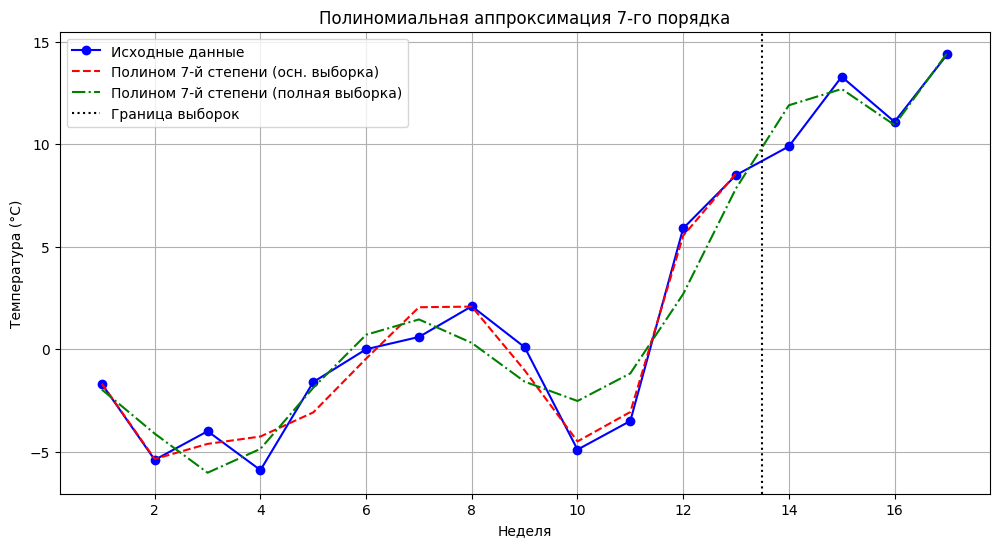


Мощность теста для основной выборки: 0.0669
Мощность теста для полной выборки: 0.0630


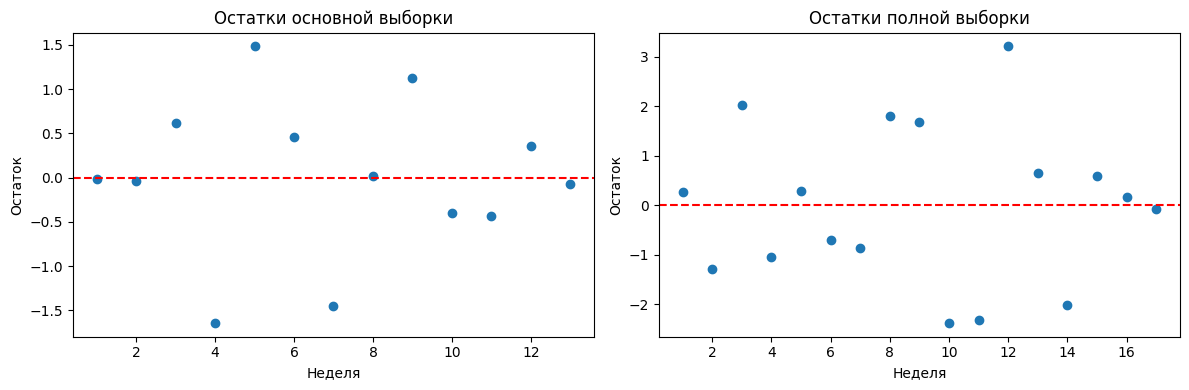

In [ ]:
# Исходные данные
weeks = np.arange(1, 18)
temperatures = np.array([-1.7, -5.4, -4.0, -5.9, -1.6, 0.0, 0.6, 2.1, 0.1,
                         -4.9, -3.5, 5.9, 8.5, 9.9, 13.3, 11.1, 14.4])

# Разделение данных на основную (13 недель) и проверочную (4 недели) выборки
main_weeks = weeks[:13]
main_temps = temperatures[:13]
test_weeks = weeks[13:]
test_temps = temperatures[13:]

# Функция для полиномиальной регрессии и расчета p-значения
def poly_regression(x, y, degree):
    # Создаем матрицу признаков для полиномиальной регрессии
    X = np.column_stack([x**i for i in range(degree+1)])

    # Добавляем константу (intercept)
    X = sm.add_constant(X[:,1:])  # исключаем первый столбец (x^0), так как add_constant добавит его

    model = sm.OLS(y, X).fit()
    p_value = model.f_pvalue
    return model, p_value

# Полиномиальная аппроксимация 7-го порядка для основной выборки
poly7_main_model, p_main = poly_regression(main_weeks, main_temps, 7)
print(f"P-значение для основной выборки (13 недель): {p_main:.6f}")

# Полиномиальная аппроксимация 7-го порядка для полной выборки
poly7_full_model, p_full = poly_regression(weeks, temperatures, 7)
print(f"P-значение для полной выборки (17 недель): {p_full:.6f}")

# Визуализация
plt.figure(figsize=(12, 6))
plt.plot(weeks, temperatures, 'bo-', label='Исходные данные')
plt.plot(main_weeks, poly7_main_model.predict(sm.add_constant(np.column_stack([main_weeks**i for i in range(1,8)]))),
         'r--', label='Полином 7-й степени (осн. выборка)')
plt.plot(weeks, poly7_full_model.predict(sm.add_constant(np.column_stack([weeks**i for i in range(1,8)]))),
         'g-.', label='Полином 7-й степени (полная выборка)')
plt.axvline(x=13.5, color='k', linestyle=':', label='Граница выборок')
plt.xlabel('Неделя')
plt.ylabel('Температура (°C)')
plt.title('Полиномиальная аппроксимация 7-го порядка')
plt.legend()
plt.grid(True)
plt.show()

# Расчет мощности теста
def calculate_power(n_full, n_main, df_num, alpha=0.05):
    # Эффект размера - разница в R² между моделями
    effect_size = (poly7_full_model.rsquared - poly7_main_model.rsquared) / (1 - poly7_full_model.rsquared)

    # Мощность для основной выборки
    power_main = sm.stats.FTestPower().power(
        effect_size=effect_size,
        df_num=df_num,
        df_denom=n_main - df_num - 1,
        alpha=alpha,
        ncc=1)

    # Мощность для полной выборки
    power_full = sm.stats.FTestPower().power(
        effect_size=effect_size,
        df_num=df_num,
        df_denom=n_full - df_num - 1,
        alpha=alpha,
        ncc=1)

    return power_main, power_full

df_num = 7  # степени свободы числителя (полином 7-й степени)
power_main, power_full = calculate_power(len(weeks), len(main_weeks), df_num)
print(f"\nМощность теста для основной выборки: {power_main:.4f}")
print(f"Мощность теста для полной выборки: {power_full:.4f}")

# Анализ остатков
residuals_main = poly7_main_model.resid
residuals_full = poly7_full_model.resid

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(main_weeks, residuals_main)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Остатки основной выборки')
plt.xlabel('Неделя')
plt.ylabel('Остаток')

plt.subplot(1, 2, 2)
plt.scatter(weeks, residuals_full)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Остатки полной выборки')
plt.xlabel('Неделя')
plt.ylabel('Остаток')
plt.tight_layout()
plt.show()

## 2.3.3 Апостериорное распределение

Анализ рассеивания частиц на двух отверстиях с построением апостериорного распределения

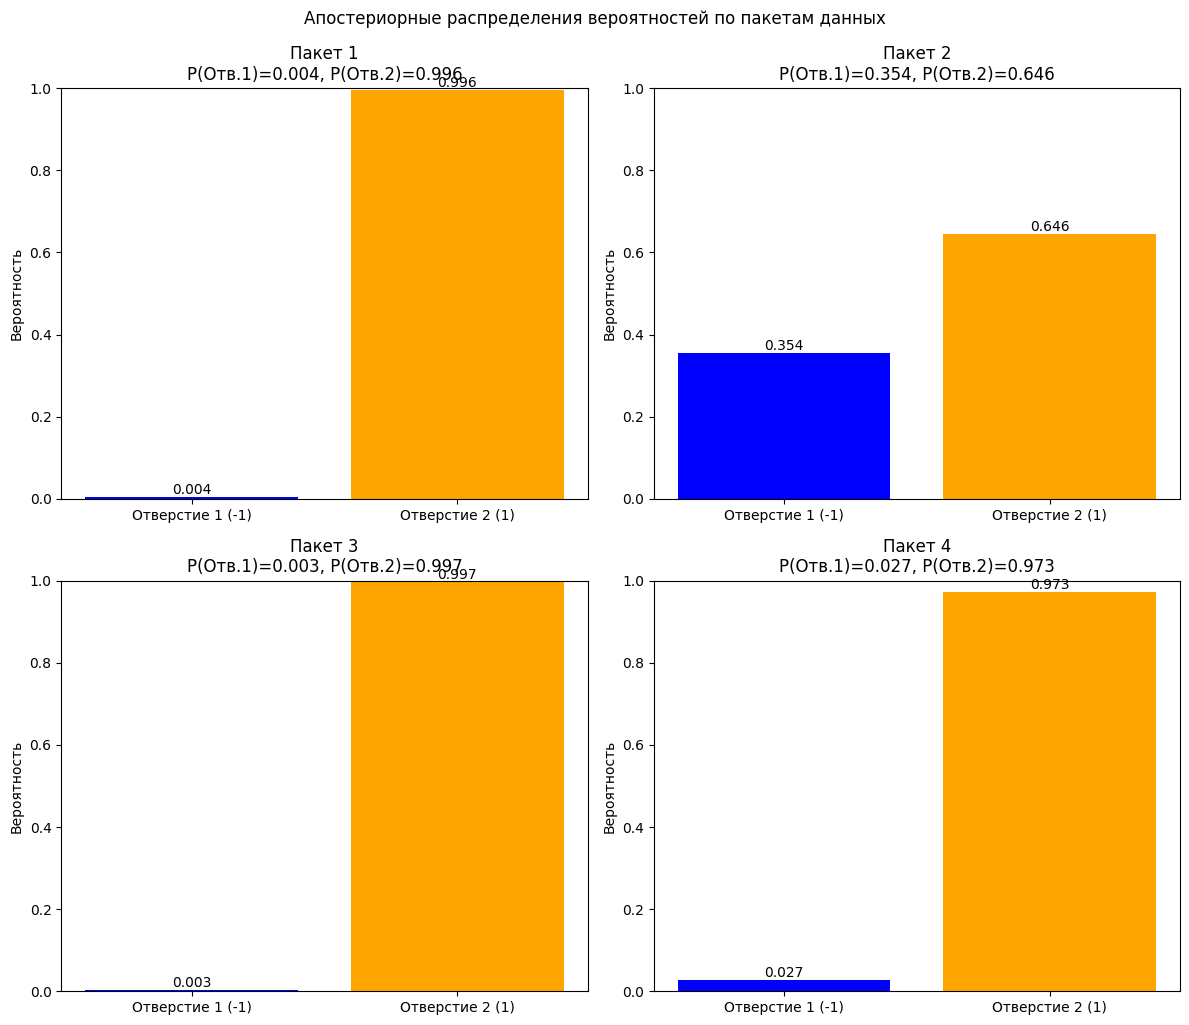

Итоговое апостериорное распределение вероятностей:
После пакета 1: P(Отверстие 1) = 0.0037, P(Отверстие 2) = 0.9963
После пакета 2: P(Отверстие 1) = 0.3543, P(Отверстие 2) = 0.6457
После пакета 3: P(Отверстие 1) = 0.0030, P(Отверстие 2) = 0.9970
После пакета 4: P(Отверстие 1) = 0.0266, P(Отверстие 2) = 0.9734


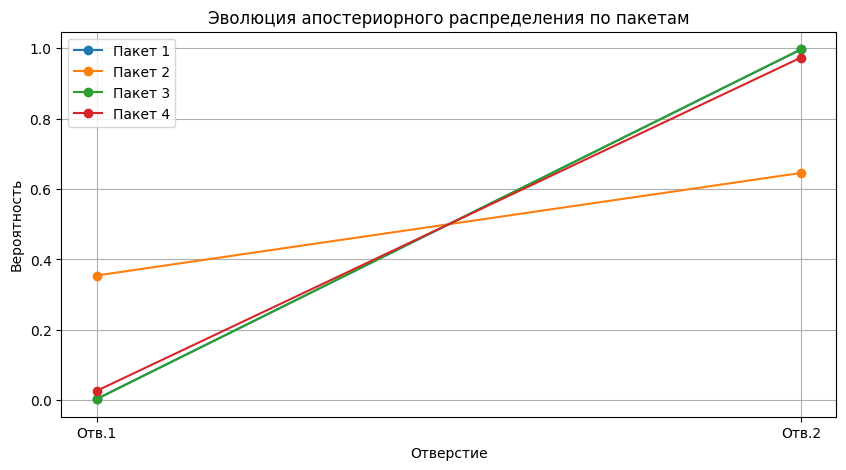

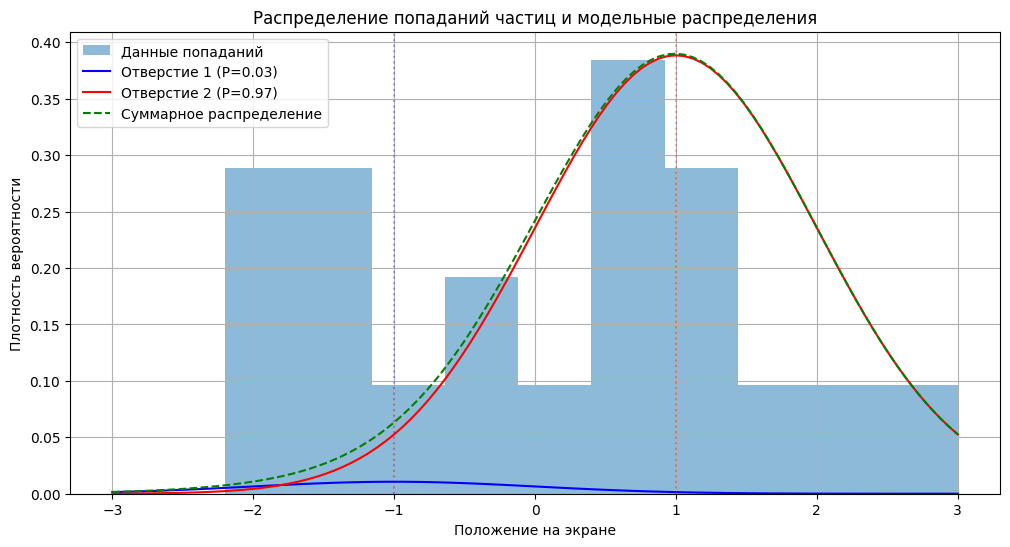

In [ ]:
# Данные о положениях попаданий частиц
data = np.array([-0.3, -1.2, 3.0, 0.4, 0.9, 1.1, -1.8, -1.3, -0.7, 0.2,
                 1.4, 2.1, -2.2, 0.8, 0.5, 1.6, -1.5, -0.4, -2.0, 1.2])

# Параметры эксперимента
hole_positions = np.array([-1, 1])  # Положения двух отверстий
sigma = 1.0  # Стандартное отклонение для распределения частиц

# Разбиваем данные на 4 пакета по 5 измерений
packets = [data[i*5:(i+1)*5] for i in range(4)]

# Априорное распределение - равномерное
prior = np.array([0.5, 0.5])

# Функция для вычисления правдоподобия
def likelihood(x, hole_pos, sigma):
    return norm.pdf(x, loc=hole_pos, scale=sigma)

# Создаем фигуру для subplot 2x2
plt.figure(figsize=(12, 10))

# Вычисляем апостериорное распределение для каждого пакета
posteriors = []
current_prior = prior.copy()

for i, packet in enumerate(packets):
    # Вычисляем правдоподобие для каждого отверстия
    like_hole1 = np.prod([likelihood(x, hole_positions[0], sigma) for x in packet])
    like_hole2 = np.prod([likelihood(x, hole_positions[1], sigma) for x in packet])

    # Вычисляем апостериорное распределение
    posterior = np.array([like_hole1 * current_prior[0],
                         like_hole2 * current_prior[1]])
    posterior /= posterior.sum()  # Нормализуем

    posteriors.append(posterior)
    current_prior = posterior  # Новое априорное для следующего пакета

    # Добавляем subplot
    plt.subplot(2, 2, i+1)
    bars = plt.bar(['Отверстие 1 (-1)', 'Отверстие 2 (1)'], posterior,
                   color=['blue', 'orange'])
    plt.title(f'Пакет {i+1}\nP(Отв.1)={posterior[0]:.3f}, P(Отв.2)={posterior[1]:.3f}')
    plt.ylabel('Вероятность')
    plt.ylim(0, 1)

    # Добавляем значения вероятностей на столбцы
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                 f'{height:.3f}',
                 ha='center', va='bottom')

plt.tight_layout()
plt.suptitle('Апостериорные распределения вероятностей по пакетам данных', y=1.02)
plt.show()

# Итоговые результаты
print("Итоговое апостериорное распределение вероятностей:")
for i, post in enumerate(posteriors):
    print(f"После пакета {i+1}: P(Отверстие 1) = {post[0]:.4f}, P(Отверстие 2) = {post[1]:.4f}")

# Визуализация всех пакетов на одном графике
plt.figure(figsize=(10, 5))
for i, post in enumerate(posteriors):
    plt.plot(['Отв.1', 'Отв.2'], post, 'o-', label=f'Пакет {i+1}')
plt.title('Эволюция апостериорного распределения по пакетам')
plt.xlabel('Отверстие')
plt.ylabel('Вероятность')
plt.legend()
plt.grid(True)
plt.show()

# Визуализация данных с предполагаемыми распределениями
x_vals = np.linspace(-3, 3, 100)
final_posterior = posteriors[-1]
dist1 = final_posterior[0] * norm.pdf(x_vals, hole_positions[0], sigma)
dist2 = final_posterior[1] * norm.pdf(x_vals, hole_positions[1], sigma)

plt.figure(figsize=(12, 6))
plt.hist(data, bins=10, density=True, alpha=0.5, label='Данные попаданий')
plt.plot(x_vals, dist1, 'b-', label=f'Отверстие 1 (P={final_posterior[0]:.2f})')
plt.plot(x_vals, dist2, 'r-', label=f'Отверстие 2 (P={final_posterior[1]:.2f})')
plt.plot(x_vals, dist1 + dist2, 'g--', label='Суммарное распределение')
plt.axvline(-1, color='blue', linestyle=':', alpha=0.3)
plt.axvline(1, color='red', linestyle=':', alpha=0.3)
plt.title('Распределение попаданий частиц и модельные распределения')
plt.xlabel('Положение на экране')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.grid(True)
plt.show()

## 2.3.4* Определение аппроксимирующей функции

Функция для определения оптимальной аппроксимации данных (экспоненциальной или полиномиальной)

In [ ]:
def determine_best_fit(times, measurements, max_poly_degree=4):
    """
    Определяет лучшую аппроксимирующую функцию (экспоненциальную или полиномиальную) для данных.

    Параметры:
    times -- список временных отсчетов
    measurements -- список измеренных значений
    max_poly_degree -- максимальная степень полинома для проверки (по умолчанию 4)

    Возвращает:
    dict: {
        'best_model': 'exp' или 'poly',
        'degree': степень полинома (если лучшая модель полиномиальная),
        'params': параметры модели,
        'r_squared': коэффициент детерминации R²,
        'residuals': остатки модели
    }
    """
    # Преобразуем в numpy массивы
    x = np.array(times)
    y = np.array(measurements)

    # Игнорируем предупреждения при плохой аппроксимации
    warnings.filterwarnings('ignore')

    # 1. Пробуем экспоненциальную аппроксимацию
    def exp_func(x, a, b, c):
        return a * np.exp(b * x) + c

    try:
        exp_params, _ = curve_fit(exp_func, x, y, p0=(1, -0.1, 1), maxfev=5000)
        exp_pred = exp_func(x, *exp_params)
        exp_ssr = np.sum((y - exp_pred)**2)
        exp_sst = np.sum((y - np.mean(y))**2)
        exp_r2 = 1 - (exp_ssr / exp_sst)
    except:
        exp_r2 = -np.inf

    # 2. Пробуем полиномиальные аппроксимации разных степеней
    best_poly_r2 = -np.inf
    best_poly_degree = 1
    best_poly_params = None

    for degree in range(1, max_poly_degree+1):
        poly_params = np.polyfit(x, y, degree)
        poly_pred = np.polyval(poly_params, x)
        poly_ssr = np.sum((y - poly_pred)**2)
        poly_sst = np.sum((y - np.mean(y))**2)
        poly_r2 = 1 - (poly_ssr / poly_sst)

        if poly_r2 > best_poly_r2:
            best_poly_r2 = poly_r2
            best_poly_degree = degree
            best_poly_params = poly_params

    # 3. Сравниваем лучшие модели
    if exp_r2 > best_poly_r2 + 0.05:  # Пороговое значение для выбора экспоненты
        return {
            'best_model': 'exp',
            'degree': None,
            'params': exp_params,
            'r_squared': exp_r2,
            'residuals': y - exp_func(x, *exp_params)
        }
    else:
        return {
            'best_model': 'poly',
            'degree': best_poly_degree,
            'params': best_poly_params,
            'r_squared': best_poly_r2,
            'residuals': y - np.polyval(best_poly_params, x)
        }

# Пример использования функции
if __name__ == "__main__":
    # Тестовые данные 1 (экспоненциальный рост)
    times_exp = np.linspace(0, 5, 20)
    measurements_exp = 2.5 * np.exp(0.8 * times_exp) + np.random.normal(0, 0.5, 20)

    # Тестовые данные 2 (полиномиальная зависимость)
    times_poly = np.linspace(0, 5, 20)
    measurements_poly = 0.5 * times_poly**3 - 2 * times_poly**2 + 3 * times_poly + 1 + np.random.normal(0, 0.5, 20)

    # Анализ экспоненциальных данных
    print("Анализ экспоненциальных данных:")
    result_exp = determine_best_fit(times_exp, measurements_exp)
    print(f"Лучшая модель: {result_exp['best_model']}")
    if result_exp['best_model'] == 'exp':
        print(f"Параметры: a={result_exp['params'][0]:.3f}, b={result_exp['params'][1]:.3f}, c={result_exp['params'][2]:.3f}")
    else:
        print(f"Степень полинома: {result_exp['degree']}")
        print(f"Параметры: {result_exp['params']}")
    print(f"R²: {result_exp['r_squared']:.4f}")

    # Анализ полиномиальных данных
    print("\nАнализ полиномиальных данных:")
    result_poly = determine_best_fit(times_poly, measurements_poly)
    print(f"Лучшая модель: {result_poly['best_model']}")
    if result_poly['best_model'] == 'exp':
        print(f"Параметры: a={result_poly['params'][0]:.3f}, b={result_poly['params'][1]:.3f}, c={result_poly['params'][2]:.3f}")
    else:
        print(f"Степень полинома: {result_poly['degree']}")
        print(f"Параметры: {result_poly['params']}")
    print(f"R²: {result_poly['r_squared']:.4f}")

Анализ экспоненциальных данных:
Лучшая модель: poly
Степень полинома: 4
Параметры: [ 0.37300064 -1.74293054  4.93911775 -1.05810453  2.92387986]
R²: 0.9999

Анализ полиномиальных данных:
Лучшая модель: poly
Степень полинома: 4
Параметры: [-0.01605488  0.65134968 -2.3875858   3.30248396  0.80019241]
R²: 0.9979
